**Convolutional neaural networks**

Where computer can see and uderstand patterns in visual data

Here we will train the deep learning model which can classify images into 2 categories.

* pizza
* steak

It is binary classification implemetation.

References:

* [CNN Explainer ](https://poloclub.github.io/cnn-explainer/)
* https://www.tensorflow.org/
* https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery




#### Load data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-05-29 13:15:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.206.128, 64.233.167.128, 64.233.166.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.206.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  54.3MB/s    in 1.9s    

2021-05-29 13:15:47 (54.3 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
#unzip downloaded file

zip_ref=zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

#### Inspect data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/ 

pizza  steak


In [5]:
#check data and list number of images available in category/class

import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 1 images in pizza_steak
There are 2 directories and 1 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 1 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


#### Visualize images

In [6]:
import pathlib
import numpy as np

In [7]:
train_path=pathlib.Path("/content/pizza_steak/train")
class_names=np.array(sorted(item.name for item in train_path.glob("*"))) #create list of class names in directory
class_names=class_names[1:] # remove .DS_store file
class_names

array(['pizza', 'steak'], dtype='<U9')

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  print(random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Shape of the image {img.shape}")
  return img 

3750472.jpg
Shape of the image (512, 512, 3)


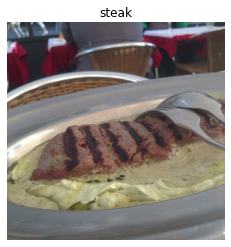

In [9]:
steak_img=view_random_images("/content/pizza_steak/train/","steak")

3906901.jpg
Shape of the image (512, 288, 3)


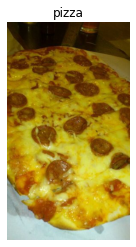

In [10]:
pizza_img=view_random_images("/content/pizza_steak/train/","pizza")

#### Build model

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

`Most of the neural network requires data i normalized format i.e numbers between 0 and 1 called as normalized data`

In [12]:
#Pre-process data get all image pixel values between 0 and 1
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from directories into batches of tensors
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             seed=42,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
train_data[0][0].shape

(32, 224, 224, 3)

In [14]:
#create model
model1=tf.keras.Sequential([
                            tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                            tf.keras.layers.Conv2D(10,3,activation="relu"),
                            tf.keras.layers.MaxPool2D(2),
                            tf.keras.layers.Conv2D(10,3,activation="relu"),
                            tf.keras.layers.Conv2D(10,3,activation="relu"),
                            tf.keras.layers.MaxPool2D(2),

                            tf.keras.layers.Flatten() ,
                            tf.keras.layers.Dense(1,activation="sigmoid")


                            
])
#compile 

model1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
#fit model

history1=model1.fit(train_data,steps_per_epoch=len(train_data),
           epochs=5,
           validation_data=valid_data,
           validation_steps=len(valid_data))
#evaluate model

Epoch 1/5
47/47 [==============================] - 42s 261ms/step - loss: 0.5393 - accuracy: 0.7147 - val_loss: 0.4450 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4168 - accuracy: 0.8067 - val_loss: 0.3584 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3973 - accuracy: 0.8353 - val_loss: 0.3380 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3677 - accuracy: 0.8347 - val_loss: 0.3108 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3485 - accuracy: 0.8607 - val_loss: 0.3059 - val_accuracy: 0.8820


`Note : If model building is taking more than 10 seconds per epoch to train.Use GPU ` 

#### Visualize model

In [15]:
import pandas as pd

Text(0.5, 0, 'epochs')

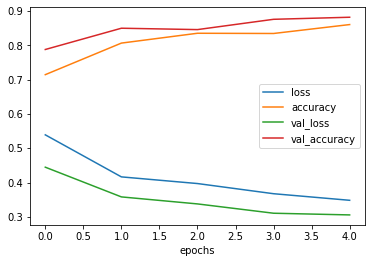

In [16]:
pd.DataFrame(history1.history).plot()
plt.xlabel("epochs")


In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#### Build using ANN instead CNN on same data

In [18]:
#set seed
tf.random.set_seed(42)

#create model
model2=tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(224,224,3)),
                            tf.keras.layers.Dense(64,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
                            tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile model
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit model
history2=model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 5.5137 - accuracy: 0.6740 - val_loss: 1.0406 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 1.3274 - accuracy: 0.7007 - val_loss: 1.0809 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 1.9497 - accuracy: 0.7167 - val_loss: 3.0161 - val_accuracy: 0.6160
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 1.0219 - accuracy: 0.7553 - val_loss: 1.1322 - val_accuracy: 0.6960
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 1.2099 - accuracy: 0.7467 - val_loss: 4.4225 - val_accuracy: 0.5500


In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 9,634,913
Trainable params: 9,634,913
Non-trainable params: 0
_________________________________________________________________


#### Observations

* From above two experiments we can observe that number of trainable parameters in each model.

* CNN parameters are phenomenaly lower than ANN,though it doesen't perfom better than CNN.

* CNN learns to sort out most important parameters in image.




In [20]:
!nvidia-smi

Sat May 29 13:26:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    57W / 149W |   1790MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------